In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [39]:
df = pd.read_excel('strong1232225913425462952.xlsx')
df.head(5)

,Date,Workout Name,Exercise Name,Set Order,Weight,Weight Unit,Reps,RPE,Distance,Distance Unit,Seconds,Notes,Workout Notes,Workout Duration
0,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Lunge (Dumbbell),1,10.0,kg,6.0,NaN,NaN,NaN,0,NaN,Warmup,32m
1,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Lunge (Dumbbell),2,10.0,kg,6.0,NaN,NaN,NaN,0,NaN,NaN,32m
2,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Bench Press (Barbell),1,20.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,32m
3,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Bench Press (Barbell),2,20.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,32m
4,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Bench Press (Barbell),3,20.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,32m


In [40]:
set_ejercicios = df['Exercise Name'].unique()
set_fechas = df['Date'].unique()

In [41]:
contenedor_df_todos_los_ejercicios = []

for ejercicio in set_ejercicios:
    filas_ejercicio_especifico = df.loc[df['Exercise Name'] == ejercicio]
    fechas_ejercicio_especifico = filas_ejercicio_especifico['Date'].unique()

    df_fecha_volumen_total = pd.DataFrame(columns = ['Date', 'Reps', 'Weight', 'Volume'])
    
    indice_fecha = 0
    for fecha in fechas_ejercicio_especifico:
        sets_ejercicio_especifico = filas_ejercicio_especifico.loc[filas_ejercicio_especifico['Date'] == fecha]
        volumen_total_por_fecha = 0

        for index, set in sets_ejercicio_especifico.iterrows():
            volumen_ejercicio = set['Reps'] * set['Weight']
            volumen_total_por_fecha += volumen_ejercicio

        df_fecha_volumen_total.loc[indice_fecha] = [fecha, set['Reps'], set['Weight'], volumen_total_por_fecha]
        df_fecha_volumen_total = df_fecha_volumen_total.fillna(0)
        indice_fecha += 1

    tupla_df_nombre_ejercicio = (df_fecha_volumen_total, ejercicio)
    contenedor_df_todos_los_ejercicios.append(tupla_df_nombre_ejercicio)

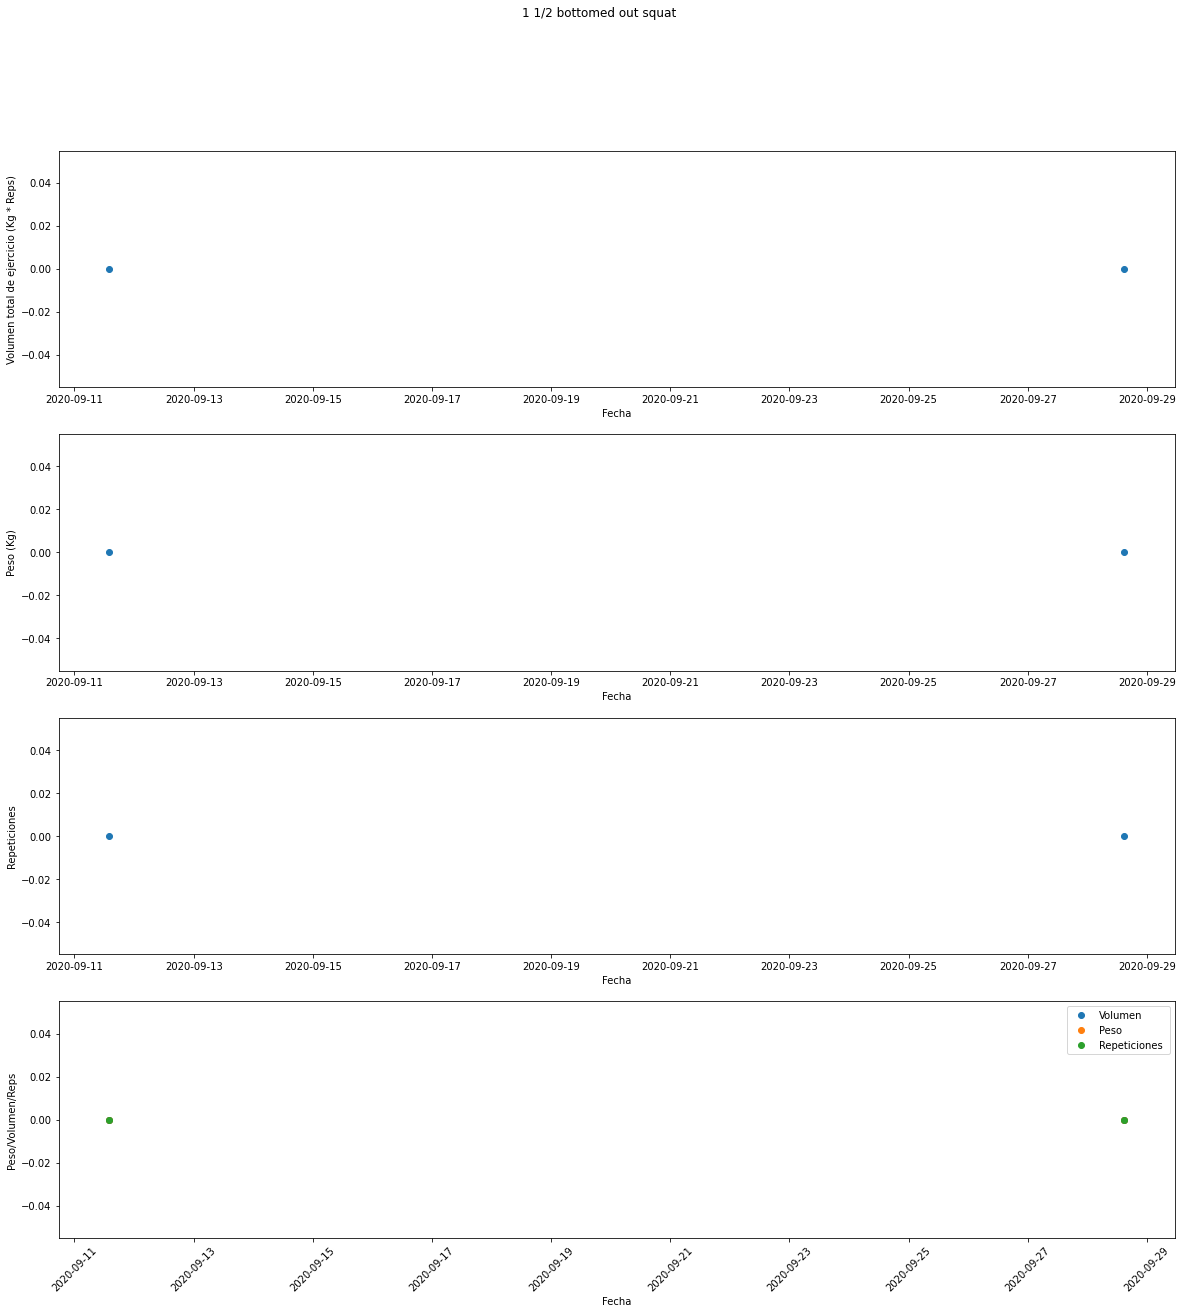

In [49]:
for tupla_ejercicio in (contenedor_df_todos_los_ejercicios):
    df_ejercicio = tupla_ejercicio[0]
    nombre_ejercicio = tupla_ejercicio[1]

    fig, axis = plt.subplots(4, figsize = (20, 20))

    fig.suptitle(f'{nombre_ejercicio}')
    plt.xticks(rotation = 45)

    axis[0].plot(df_ejercicio['Date'], df_ejercicio['Volume'], 'o')
    axis[0].set_ylabel(f'Volumen total de ejercicio (Kg * Reps)')
    axis[0].set_xlabel(f'Fecha')

    axis[1].plot(df_ejercicio['Date'], df_ejercicio['Weight'], 'o')
    axis[1].set_ylabel(f'Peso (Kg)')
    axis[1].set_xlabel(f'Fecha')

    axis[2].plot(df_ejercicio['Date'], df_ejercicio['Reps'], 'o')
    axis[2].set_ylabel(f'Repeticiones')
    axis[2].set_xlabel(f'Fecha')

    axis[3].plot(df_ejercicio['Date'], df_ejercicio['Volume'], 'o', label = 'Volumen')
    axis[3].plot(df_ejercicio['Date'], df_ejercicio['Weight'], 'o', label = 'Peso')
    axis[3].plot(df_ejercicio['Date'], df_ejercicio['Reps'], 'o', label = 'Repeticiones ')
    axis[3].set_ylabel(f'Peso/Volumen/Reps')
    axis[3].set_xlabel(f'Fecha')
    axis[3].legend()

    try:
        nombre_archivo = f'{nombre_ejercicio}.svg'
        ruta = os.path.join('imagenes_ejercicios', nombre_archivo)
        fig.savefig(ruta, format = 'svg', dpi = 300)
        plt.close(fig)

    except FileNotFoundError:
        pass
